# Data Exploration

In [3]:
import sys
import os

# Data Science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cross support for windows and linux
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

data_path = os.path.join(project_root, 'data', 'raw', 'fake_and_real_news.csv')
processed_path = os.path.join(project_root, 'data', 'processed', 'processed_data.csv')

## General Information

In [4]:
# Load csv
data = pd.read_csv(data_path)

In [5]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    9900 non-null   object
 1   label   9900 non-null   object
dtypes: object(2)
memory usage: 154.8+ KB


(9900, 2)

In [6]:
print("Random sample of rows in the dataframe:")
data.sample(3)

Random sample of rows in the dataframe:


,Text,label
4286,Trump urges Congress to pass short-term spendi...,Real
6285,Middle East adviser departs Trump's National S...,Real
6841,Trump’s Disastrously-Misspelled Terrorist Att...,Fake


In [7]:
print("Data Frame Grouped by Label: ")
data.groupby('label').describe()

Data Frame Grouped by Label: 


Text                                                               
      count unique                                                top freq
label                                                                     
Fake   5000   5000   Top Trump Surrogate BRUTALLY Stabs Him In The...    1
Real   4900   4865  Highlights: The Trump presidency on April 13 a...    8

General Observations
- no null values in the dataframe
- 2 columns: Text, label
- label has two possible values of Fake or Real
- near equal amount of real and fake labeled news articles (real = 4900, fake = 5000)
- 4865 unique real articles out of 4900. Duplicate articles in the real group


## Feature Engineering

Potential features to distinguish between real and fake news:
- article length
- sentiment scores:
    - Good news should be neutral
    - fake news has bias
- word count
    - maybe specific words appear more frequently in either fake or real news

In [8]:
# Data frame is preprocessed before hand using ./scripts/preprocessdata.py to save time.
# Removed later to save on memory since not all features will be utlized in model
# To regenerate run ./scripts/preprocessdata.py in project root
processed_df = pd.read_csv(processed_path)

In [9]:
processed_df

,Text,label,label_binary,length,neg_score,neu_score,pos_score,compound_score,cleaned_text
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,1,1545,0.119,0.817,0.064,-0.9315,trump surrogate brutally stab pathetic video...
1,U.S. conservative leader optimistic of common ...,Real,0,758,0.060,0.800,0.140,0.8537,u.s conservative leader optimistic common grou...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,0,6157,0.093,0.791,0.116,0.9821,trump propose u.s tax overhaul stir concern de...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,1,2269,0.101,0.884,0.014,-0.9833,court force ohio allow million illegally pur...
4,Democrats say Trump agrees to work on immigrat...,Real,0,3748,0.059,0.853,0.088,0.9131,democrats trump agree work immigration bill wa...
...,...,...,...,...,...,...,...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake,1,3243,0.088,0.860,0.052,-0.9714,wikileak admit screw immensely twitter poll ...
9896,Trump consults Republican senators on Fed chie...,Real,0,1950,0.014,0.875,0.112,0.9885,trump consult republican senator fed chief can...
9897,Trump lawyers say judge lacks jurisdiction for...,Real,0,4343,0.101,0.842,0.057,-0.9735,trump lawyer judge lack jurisdiction defamatio...
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake,1,2580,0.088,0.763,0.149,0.9777,watch right wing pastor falsely credit trump...


### Article Length

array([<Axes: title={'center': 'Fake'}>, <Axes: title={'center': 'Real'}>],
      dtype=object)

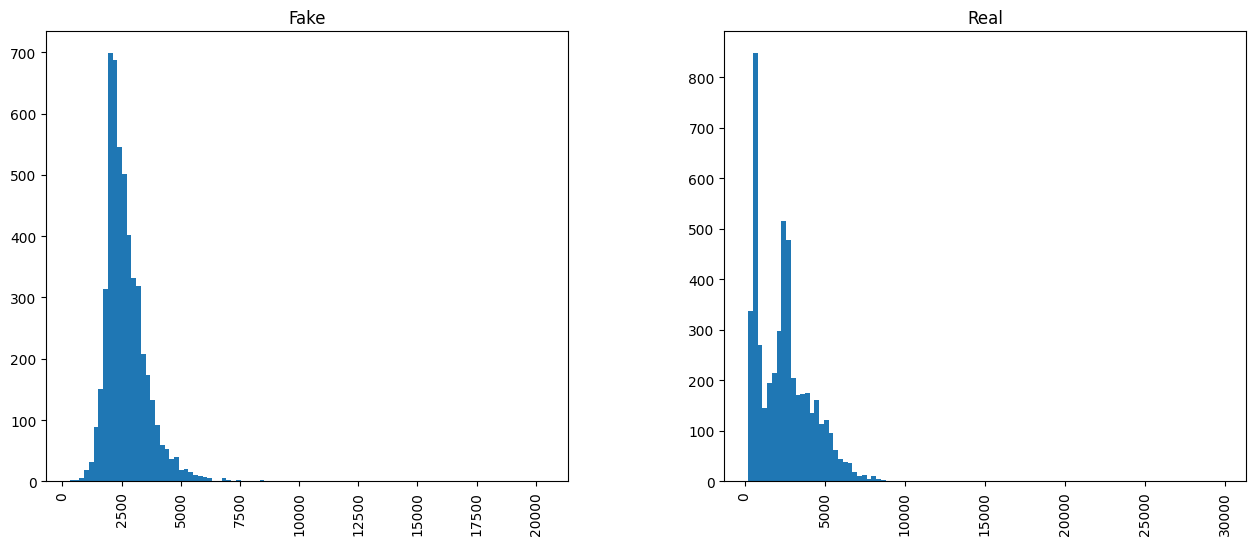

In [10]:
processed_df.hist(column='length', by='label', bins=100, figsize=(15,6))

Observations:
- fake articles normal distribution for length. Peak distribution around 2500 characters
- real articles have varying distribution of length. Spike in number of short articles

### Sentiment Analysis

Using vader to calculate sentiment scores

Sentiment Score calculation is calculated before text cleaning, and lemmatization because vader takes into account capitaliztion and syntax nuances.

Vader Scores:
- pos_score - percent of the article with a positive sentiment
- neu_score - percent of the article with a neutral sentiment
- neg_score - percent of the article with a negative sentiment
- compound_score - normalized score takes into account the above three. Ranges (-1, 1). Negative values is negative, neutral is around 0, and values close to 1 indicate positve sentiment

In [13]:
pos = processed_df.loc[processed_df.compound_score > 0.999]
print("Example of Text of article considered positive: ")
print(pos.iloc[0])
pos.iloc[0]["Text"]

Example of Text of article considered positive: 
Text              Trump son-in-law Kushner's congressional state...
label                                                          Real
label_binary                                                      0
length                                                        21610
neg_score                                                     0.031
neu_score                                                     0.881
pos_score                                                     0.089
compound_score                                               0.9997
cleaned_text      trump son law kushner congressional statement ...
Name: 277, dtype: object


"Trump son-in-law Kushner's congressional statement WASHINGTON (Reuters) - I am voluntarily providing this statement, submitting documents, and sitting for interviews in order to shed light on issues that have been raised about my role in the Trump for President Campaign and during the transition period. I am not a person who has sought the spotlight. First in my business and now in public service, I have worked on achieving goals, and have left it to others to work on media and public perception. Because there has been a great deal of conjecture, speculation, and inaccurate information about me, I am grateful for the opportunity to set the record straight. My Role in the Trump for President Campaign Before joining the administration, I worked in the private sector, building and managing companies. My experience was in business, not politics, and it was not my initial intent to play a large role in my father-in-law’s campaign when he decided to run for President. However, as the campai

In [14]:
neg = processed_df.loc[processed_df.compound_score < -0.999]
print("Example of Text of article considered negative: ")
print(neg.iloc[0])
neg.iloc[0]["Text"]

Example of Text of article considered negative: 
Text               ‘Piece Of Sh*t’: GOP Senator Immediately Regr...
label                                                          Fake
label_binary                                                      1
length                                                         4757
neg_score                                                     0.264
neu_score                                                     0.647
pos_score                                                     0.089
compound_score                                              -0.9996
cleaned_text        piece sh*t gop senator immediately regret tr...
Name: 66, dtype: object


' ‘Piece Of Sh*t’: GOP Senator Immediately Regrets Trolling Bernie Sanders Over Trumpcare The Republican  healthcare  plan is a travesty and the numbers don t lie. Sen. Orrin Hatch does, though. Sen. Bernie Sanders (I-VT) tweeted on Thursday,  Let us be clear and this is not trying to be overly dramatic: Thousands of people will die if the Republican health care bill becomes law.  Sanders is correct but he s being stingy with his numbers. Actually, tens of thousands of our country s neediest will die if Trumpcare becomes law and all because Republicans want to gift the wealthy with a tax cut.Let us be clear and this is not trying to be overly dramatic: Thousands of people will die if the Republican health care bill becomes law.  Bernie Sanders (@BernieSanders) June 23, 2017Medicaid saves lives and that s a fact that Hatch refuses to acknowledge. The Utah Senator responded to Sanders  accurate tweet, saying,  The brief time when we were *not* accusing those we disagree with of murder wa

In [15]:
neu = processed_df.loc[(processed_df.compound_score > -0.05) & (processed_df.compound_score < .05)]
print("Example of Text of article considered neuatral: ")
print(neu.iloc[0])
neu.iloc[0]["Text"]

Example of Text of article considered neuatral: 
Text              Trump says healthcare reform push may need add...
label                                                          Real
label_binary                                                      0
length                                                          547
neg_score                                                       0.0
neu_score                                                       1.0
pos_score                                                       0.0
compound_score                                                  0.0
cleaned_text      trump say healthcare reform push need addition...
Name: 27, dtype: object


'Trump says healthcare reform push may need additional money WASHINGTON (Reuters) - President Donald Trump on Tuesday said that the Republican push to repeal Obamacare may require additional money for healthcare, but he did not specify how much more funding would be needed or how it might be used. Trump told Republican Senators joining him for lunch at the White House that their planned healthcare reform bill would need to be “generous” and “kind.” “That may be adding additional money into it,” Trump said, without offering further details.   '

C:\Users\antho\AppData\Local\Temp\ipykernel_33304\2211174646.py:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(


[Text(0.5, 1.0, 'Sentiment by News Type')]

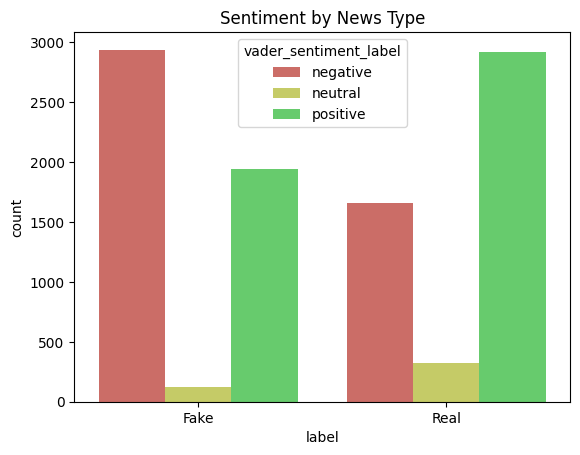

In [16]:
# Count Plot of Sentiment(postive, negative, neutral) for fake and real news
bins = [-1, -0.2, 0.2, 1]
names = ['negative', 'neutral', 'positive']
processed_df['vader_sentiment_label'] = pd.cut(processed_df['compound_score'], bins, labels=names)

sns.countplot(
    x = 'label',
    hue = 'vader_sentiment_label',
    palette = sns.color_palette('hls'),
    data = processed_df
).set(title="Sentiment by News Type")

array([<Axes: title={'center': 'Fake'}>, <Axes: title={'center': 'Real'}>],
      dtype=object)

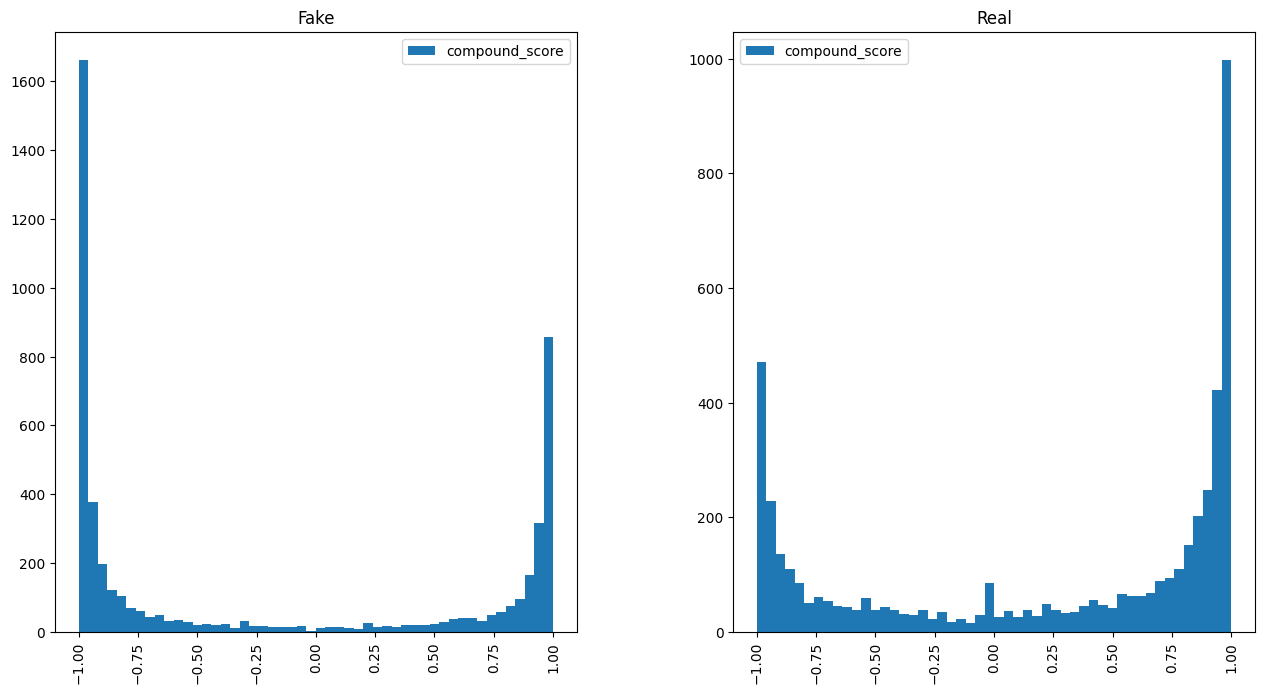

In [17]:
# Compund Score Histogram of both real and fake news
processed_df.hist(column="compound_score", by='label', figsize=(15,8), legend=True, bins=50)

Observations:
- real news articles have higher number of articles considered neautral
- both types of articles can be have signinficant biases
- fake news articles can have a neutral sentiment while still being fake


<Axes: >

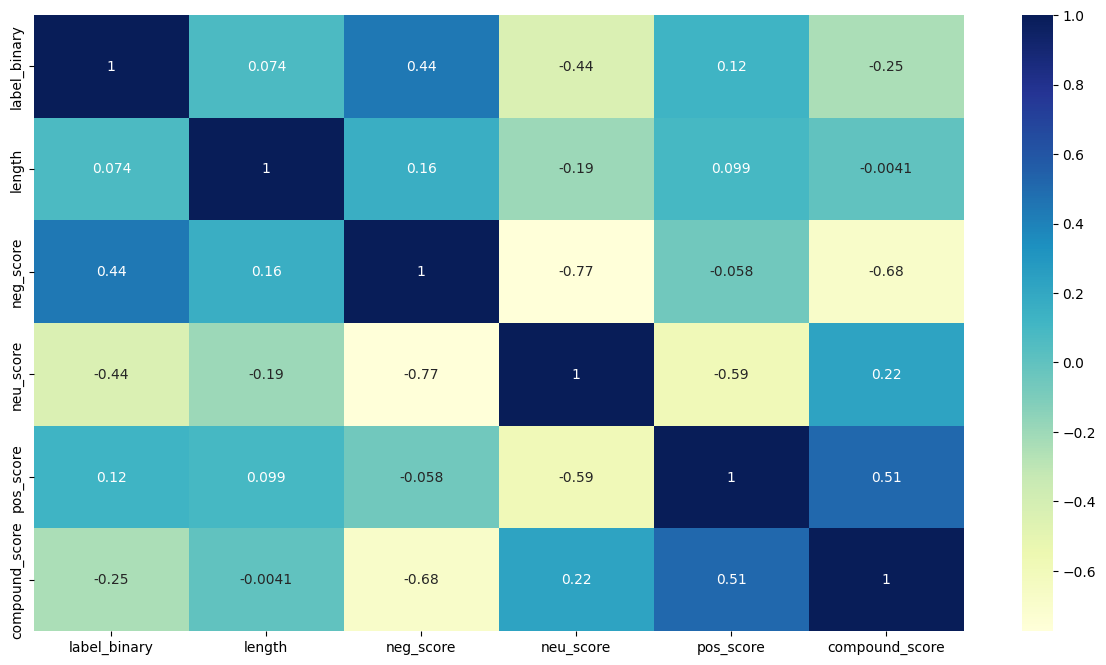

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(processed_df.corr(numeric_only=True), annot=True, cmap="YlGnBu")

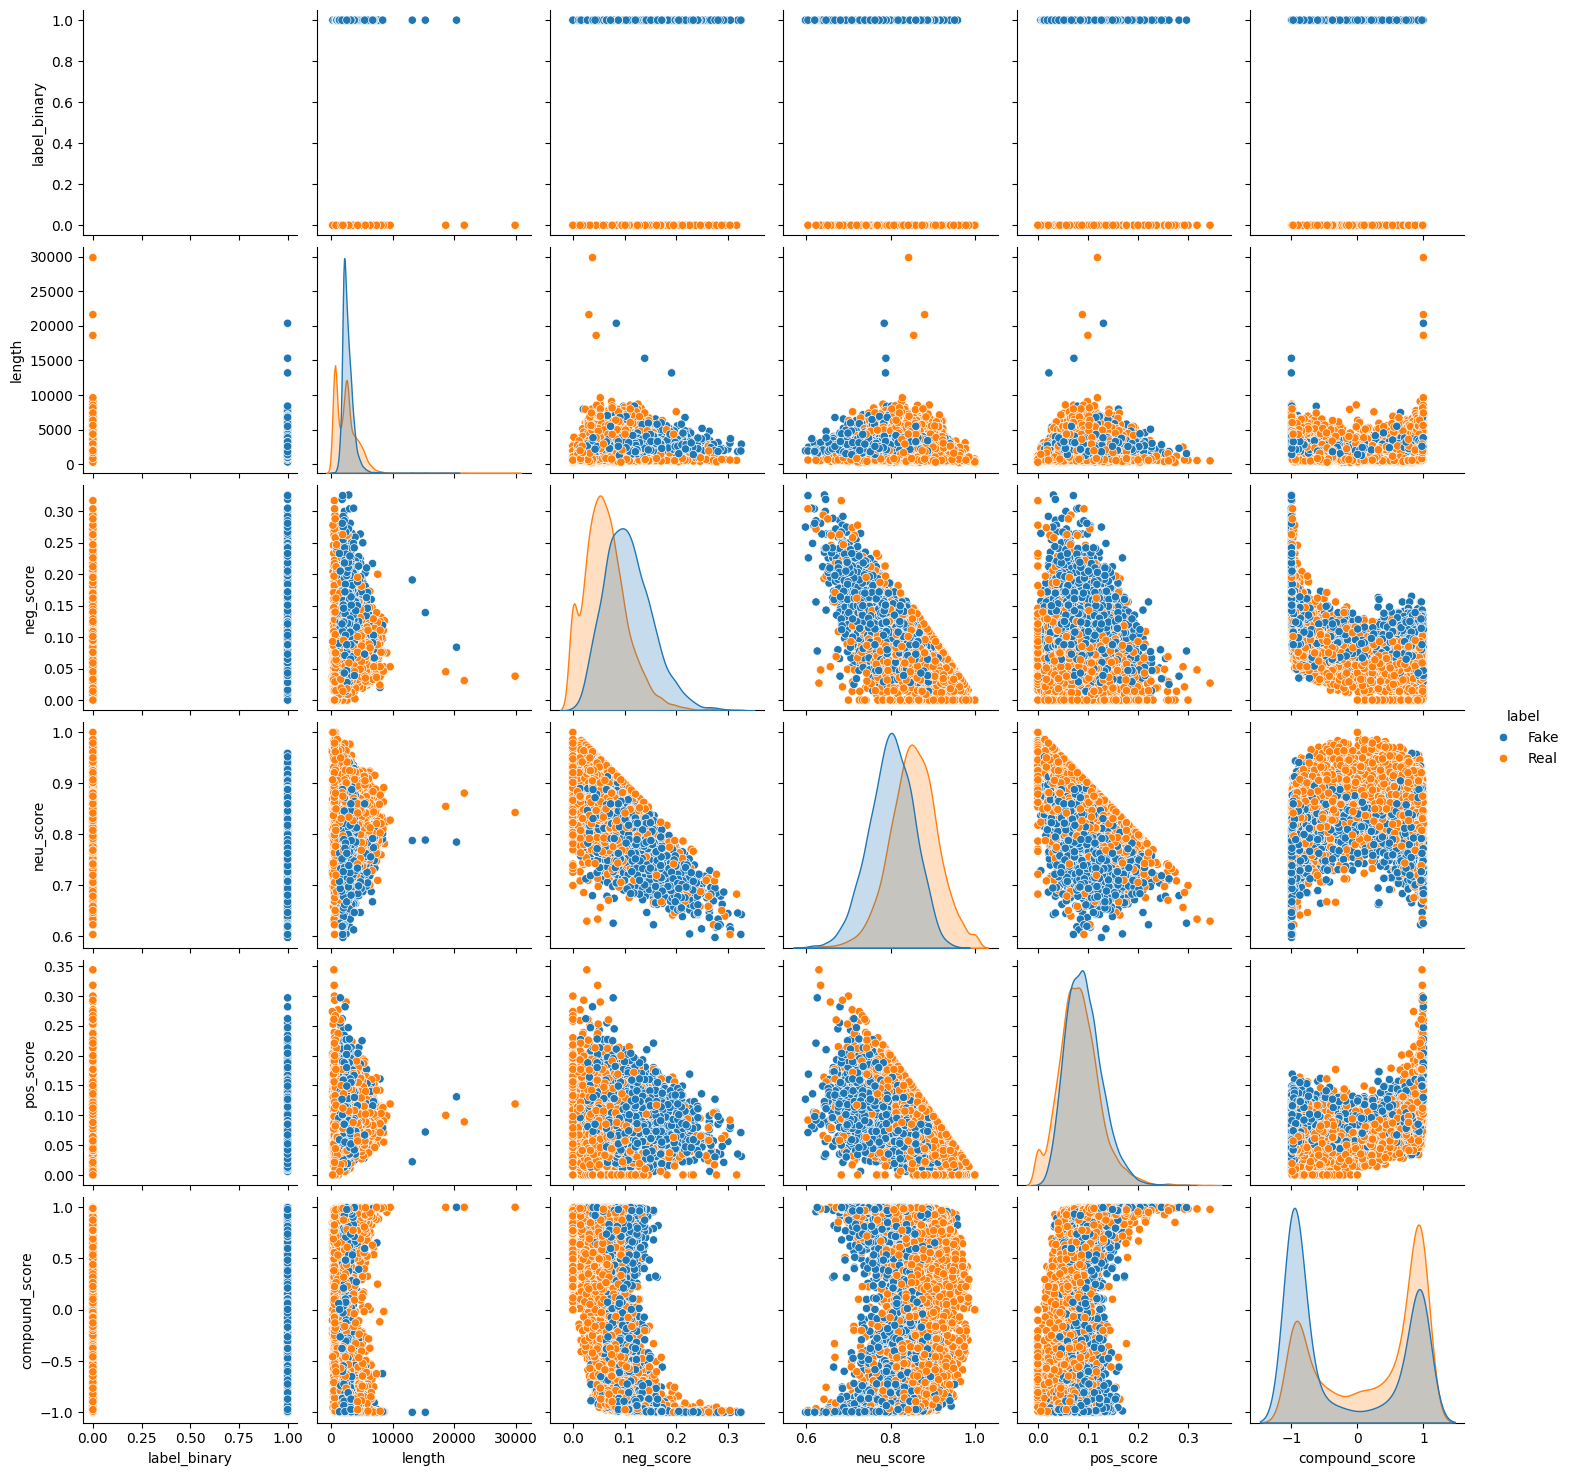

In [19]:
# Pairplot 
sns.pairplot(data=processed_df, hue='label')

Analysis:
- there is a negative correlation between how neutral an article is and fake news (-.44). Makes sense because good news is meant to be unbiased.
- postive correlation between negative sentiment and fake news (.44). Fake news often has biases
- not clear separation between real and fake news on pair plot. Outliers exist in both catagories. Alot of overlap. Implies sentiment might not be enough to accuratly predict real from fake news. Fake news can be written in both a positve, negative or neutral tone.
- compound score is normalized scale of sentiment and has a weak correlation (-.25)


### Common Words

In [21]:
from wordcloud import WordCloud

def show_wordcloud(dataframe, title, feat):
    content = " ".join(i for i in dataframe[feat])
    wordcloud = WordCloud().generate(content)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

In [22]:
# Separte real and fake articles for wordcloud
real_df = processed_df[processed_df["label"] == "Real"]
fake_df = processed_df[processed_df["label"] == "Fake"]

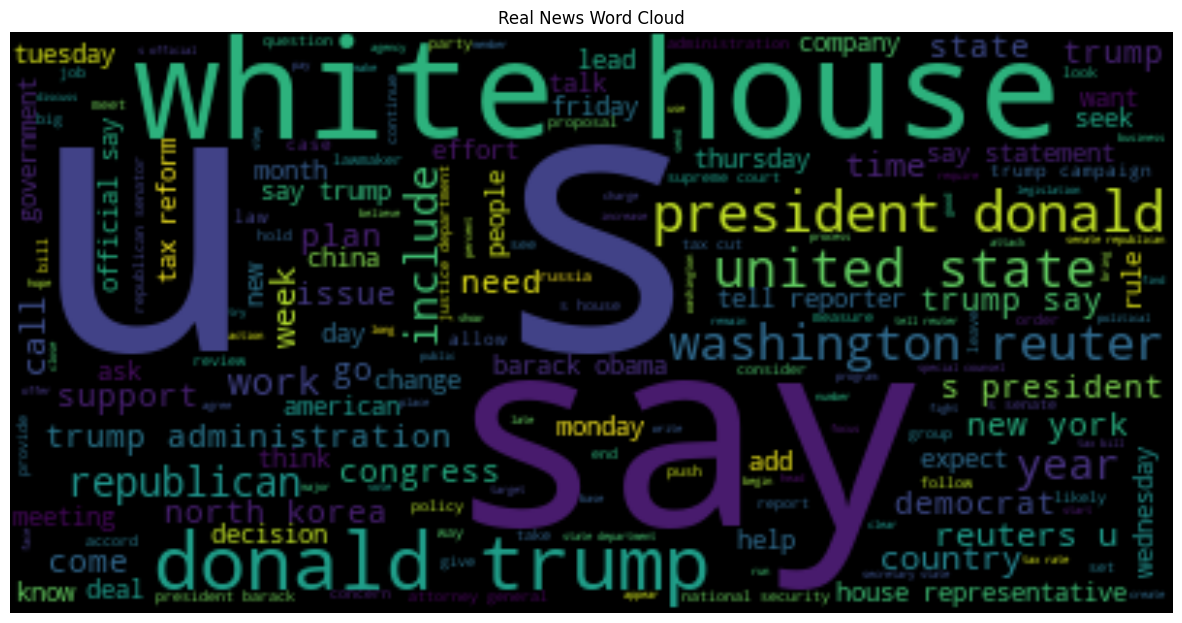

In [23]:
show_wordcloud(real_df, "Real News Word Cloud", "cleaned_text")

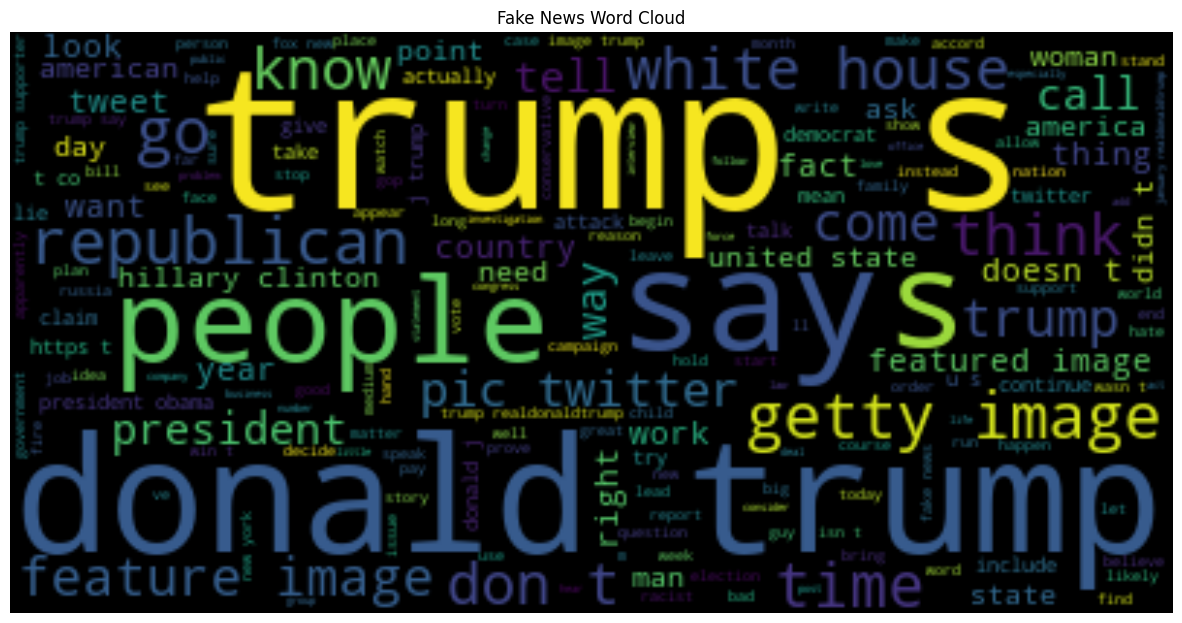

In [24]:
show_wordcloud(fake_df, "Fake News Word Cloud", "cleaned_text")

Observations:
- alot of common terms in both types of news articles such as trump, white house. Depending on current events articles from both catagories would have similiar areas of interest and topics
- count of single words might not be enough to create accurate classification model. Real and fake articles can utilize similiar word usage and topics

Not enough semantic meaning being captured. Does not factor in importance of words and articles of varying lengths.